In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Read in the split data
X_train = pd.read_parquet('/content/drive/My Drive/CSVs/X_train.parquet')
X_test = pd.read_parquet('/content/drive/My Drive/CSVs/X_test.parquet')
y_train = pd.read_parquet('/content/drive/My Drive/CSVs/y_train.parquet')
y_test = pd.read_parquet('/content/drive/My Drive/CSVs/y_test.parquet')



In [ ]:
# Turn y into a numpy array
y_train = y_train.values
type(y_train)

numpy.ndarray

In [ ]:
# Check current columns
X_train.columns[:10]

Index(['level_0', 'book title', 'book author', 'total words',
       'vividness score', 'passive voice', 'all adverbs', 'ly-adverbs',
       'non-ly-adverbs', 'publication year'],
      dtype='object')

In [ ]:
# Drop non-predictive features
X_train = X_train.drop(columns=['level_0', 'book title', 'book author','book genres', 'num genres'],axis=1)
X_test = X_test.drop(columns=['level_0', 'book title', 'book author','book genres', 'num genres'],axis=1)

In [ ]:
# Get rid of null elements
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
# Split the columns based on the scaler used--minmax for wordcounts, standard for the others
std_columns = X_train.columns[:7]
minmax_columns = X_train.columns[7:]


In [ ]:
std_columns

Index(['total words', 'vividness score', 'passive voice', 'all adverbs',
       'ly-adverbs', 'non-ly-adverbs', 'publication year'],
      dtype='object')

In [ ]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [ ]:
X_train_std = std_scaler.fit_transform(X_train[std_columns])
X_train_minmax = minmax_scaler.fit_transform(X_train[minmax_columns])
X_test_std = std_scaler.transform(X_test[std_columns])
X_test_minmax = minmax_scaler.transform(X_test[minmax_columns])


In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train_minmax)

PCA(n_components=10)

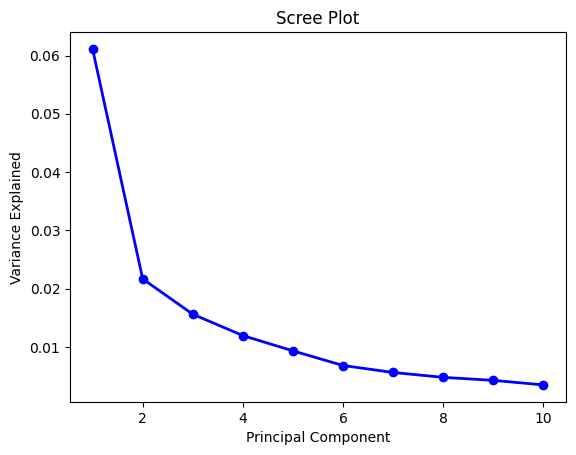

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [ ]:
np.cumsum(pca.explained_variance_ratio_)


array([0.06113005, 0.08278823, 0.09838111, 0.11030746, 0.11960903,
       0.12639803, 0.13199383, 0.13675054, 0.14099021, 0.14444828])

The results of PCA show no components explaining more than 6% of the variance, which is not encouraging.

In [ ]:
pca = PCA(n_components=100)
pca.fit(X_train_minmax)

PCA(n_components=100)

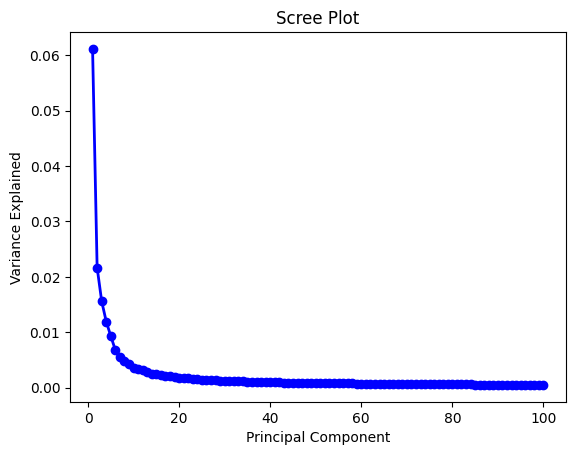

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [ ]:
np.cumsum(pca.explained_variance_ratio_)



array([0.06113005, 0.08278823, 0.09838111, 0.11030746, 0.11960903,
       0.12639803, 0.13199383, 0.13675054, 0.14099022, 0.14444832,
       0.14782921, 0.15105779, 0.15395486, 0.15645836, 0.15888521,
       0.16117838, 0.1632568 , 0.16530493, 0.1671675 , 0.16895117,
       0.17066201, 0.17234107, 0.17385865, 0.17534309, 0.17678138,
       0.17817494, 0.17953294, 0.18084053, 0.18212598, 0.18338329,
       0.18461041, 0.18580526, 0.18695906, 0.18809907, 0.18917795,
       0.19023568, 0.19126209, 0.19226722, 0.19326321, 0.19423387,
       0.19518422, 0.19612324, 0.19703487, 0.19793729, 0.19883112,
       0.19970905, 0.20057688, 0.20143176, 0.20226241, 0.20308814,
       0.20390277, 0.20470243, 0.20549131, 0.20627822, 0.20706057,
       0.20782741, 0.2085834 , 0.2093349 , 0.21007306, 0.21079905,
       0.21151932, 0.2122271 , 0.2129314 , 0.21363004, 0.2143166 ,
       0.21499373, 0.21566636, 0.2163296 , 0.21698591, 0.21763597,
       0.21828155, 0.21891642, 0.21954567, 0.22017223, 0.22079

Even with 100 components, no more than 24% of the variance is explained. Time to try something different.

In [ ]:
# Check the percentage of nonzero components in the wordcount data
np.count_nonzero(X_train_minmax)/X_train_minmax.size



0.06057188351144687

It seems in the wordcount data, about 94% of the cells are 0. Let's try SparsePCA instead.

In [ ]:
from sklearn.decomposition import SparsePCA

In [ ]:
# Try SparsePCA on the sparse wordcount elements.
sparse_PCA = SparsePCA(n_components=10, random_state=42,n_jobs=-1)
X_train_pca = sparse_PCA.fit_transform(X_train_minmax)
X_test_pca = sparse_PCA.transform(X_test_minmax)

In [ ]:
import joblib

In [ ]:
joblib.dump(sparse_PCA, '/content/drive/My Drive/Models/sparse_pca_model.pkl')

['/content/drive/My Drive/Models/sparse_pca_model.pkl']

In [ ]:
joblib.dump(X_train_pca, '/content/drive/My Drive/CSVs/X_train_pca.pkl')
joblib.dump(X_test_pca, '/content/drive/My Drive/CSVs/X_test_pca.pkl')


['/content/drive/My Drive/CSVs/X_test_pca.pkl']

In [ ]:
# Retrieve SparsePCA data
sparse_PCA = joblib.load('/content/drive/My Drive/Models/sparse_pca_model.pkl')
X_train_pca = joblib.load('/content/drive/My Drive/CSVs/X_train_pca.pkl')
X_test_pca = joblib.load('/content/drive/My Drive/CSVs/X_test_pca.pkl')

In [ ]:
type(sparse_PCA)

sklearn.decomposition._sparse_pca.SparsePCA

In [ ]:
type(X_train_std)

numpy.ndarray

In [ ]:
# Combine the analysis data with the wordcount data
X_train_transformed = np.concatenate((X_train_std, X_train_pca), axis=1)
X_test_transformed = np.concatenate((X_test_std, X_test_pca), axis=1)
np.save('/content/drive/My Drive/CSVs/X_train_transformed.npy',X_train_transformed)
np.save('/content/drive/My Drive/CSVs/X_test_transformed.npy',X_test_transformed)

In [ ]:
# Check the shape of the data
X_train_transformed.shape

(16364, 17)

In [ ]:
X_test_transformed.shape

(4092, 17)

In [ ]:
# Check the form of the data
X_train_transformed[:5]



array([[-5.49190301e-01, -1.90661830e+00, -1.09939318e+00,
         7.63850899e-01,  1.10849277e+00,  1.05669509e-01,
         7.48382124e-04, -6.66587690e-01,  1.83792804e+00,
        -8.83340763e-01, -1.71984635e-01, -3.29705495e-01,
        -7.23069536e-01, -6.04095052e-01, -8.32133013e-01,
        -1.81709608e-01, -3.80759224e-01],
       [-2.60187016e-01,  1.29119488e-02,  1.38112696e+00,
         1.66325327e-01, -1.34451156e-01,  4.42914136e-01,
         1.42283648e-01,  1.40978094e-01, -5.55958714e-01,
         2.10802418e-01, -3.41134600e-01, -3.32092150e-01,
        -3.24634169e-01,  9.22704583e-02,  3.74997341e-02,
        -2.56170467e-01,  5.40717987e-01],
       [ 1.98459367e+00, -1.79785599e+00, -1.22578911e+00,
        -2.24244964e+00, -9.92674344e-01, -2.65360471e+00,
         6.03421781e-02, -5.92862977e-01,  3.55927880e+00,
        -3.36122148e-01, -2.94663837e-01,  1.89878996e+00,
        -4.40521238e-01, -2.91344179e-01, -7.38500368e-02,
         5.71264461e-01,  1.0